**Question 1 : What is Dimensionality Reduction? Why is it important in machine learning?**

**Answer:**  
Dimensionality reduction is the process of reducing the number of input variables (features) in a dataset while retaining as much relevant information as possible. It can be done via feature selection (choosing a subset of existing features) or feature extraction (creating new, lower-dimensional features — e.g., PCA).

**Why important:**  
- Reduces computational cost and memory usage.  
- Mitigates the curse of dimensionality (improves distance-based methods, generalization).  
- Helps remove noise and redundant features, often improving model performance and interpretability.  
- Enables visualization of high-dimensional data in 2D/3D for insight.

**Question 2: Name and briefly describe three common dimensionality reduction techniques.**

**Answer:**  
1. **Principal Component Analysis (PCA):** Linear technique that finds orthogonal directions (principal components) capturing maximum variance. Used for feature extraction and compression.  
2. **t-SNE (t-distributed Stochastic Neighbor Embedding):** Non-linear technique for visualizing high-dimensional data in 2 or 3 dimensions, preserving local structure (good for clusters). Not suited for general-purpose feature reduction for modeling.  
3. **Autoencoders:** Neural-network based non-linear feature extractor where an encoder compresses inputs to a low-dimensional latent space and a decoder reconstructs the input; trained to minimize reconstruction error. Good for complex non-linear structure.

**Question 3: What is clustering in unsupervised learning? Mention three popular clustering algorithms.**

**Answer:**  
Clustering is the task of grouping unlabeled data points so that points in the same group (cluster) are more similar to each other than to those in other clusters. It's used for exploratory data analysis, segmentation, anomaly detection, and more.

**Three popular algorithms:**  
- **K-Means:** Partition-based; assigns points to the nearest centroid and iteratively updates centroids. Requires choosing K.  
- **DBSCAN:** Density-based; finds clusters of high density and marks low-density points as noise/outliers. Good for arbitrary-shaped clusters.  
- **Hierarchical Clustering (Agglomerative):** Builds a dendrogram by iteratively merging/splitting clusters; does not require specifying number of clusters upfront (you can cut the tree at a chosen level).

**Question 4: Explain the concept of anomaly detection and its significance.**

**Answer:**  
Anomaly detection (outlier detection) is identifying data points, events, or observations that deviate significantly from the majority of the data. Anomalies can indicate errors, fraud, rare events, or novel phenomena.

**Significance:**  
- Security (intrusion/fraud detection).  
- System health monitoring (fault detection in machines).  
- Data cleaning (detecting corrupted records).  
- Early-warning systems (detecting rare but important occurrences).

**Question 5: List and briefly describe three types of anomaly detection techniques.**

**Answer:**  
1. **Statistical Methods:** Assume a statistical distribution for normal data (e.g., Gaussian); points with low probability under that model are anomalies (e.g., z-score, Gaussian mixture models).  
2. **Proximity-Based Methods:** Use distance or density to identify anomalies (e.g., k-NN distance, LOF — Local Outlier Factor). Points far from neighbors or in low-density regions are anomalous.  
3. **Model-Based / Machine Learning Methods:** Train models to learn normal behavior and flag deviations — examples include One-Class SVM, Isolation Forest, and autoencoder-based reconstruction error methods.

**Question 6: What is time series analysis? Mention two key components of time series data.**

**Answer:**  
Time series analysis studies datasets where observations are ordered in time. It focuses on understanding patterns, forecasting future values, and detecting structural changes or anomalies.

**Two key components:**  
- **Trend:** Long-term increase or decrease in the data.  
- **Seasonality:** Repeating short-term cycles (e.g., daily, weekly, yearly patterns). (Another common component is **noise** or irregular component.)

**Question 7: Describe the difference between seasonality and cyclic behavior in time series.**

**Answer:**  
- **Seasonality:** Regular, fixed-period patterns that repeat at known intervals (e.g., hourly, daily, weekly, yearly) often driven by the calendar or natural cycles. The period is constant and known.  
- **Cyclic behavior:** Fluctuations with variable length and amplitude not tied to a fixed calendar period, usually influenced by economic cycles or other external factors; cycles are irregular and can span multiple years.  
Seasonality is predictable and repeatable; cyclic behavior is less regular and often harder to model precisely.

**Question 8: Write Python code to perform K-means clustering on a sample dataset. (Include your Python code and output in the code box below.)**

Silhouette score (k=3): 0.4599
Adjusted Rand Index (vs true labels): 0.6201
\nCluster centers (original scale):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.801887          2.673585           4.369811          1.413208
1           5.006000          3.428000           1.462000          0.246000
2           6.780851          3.095745           5.510638          1.972340


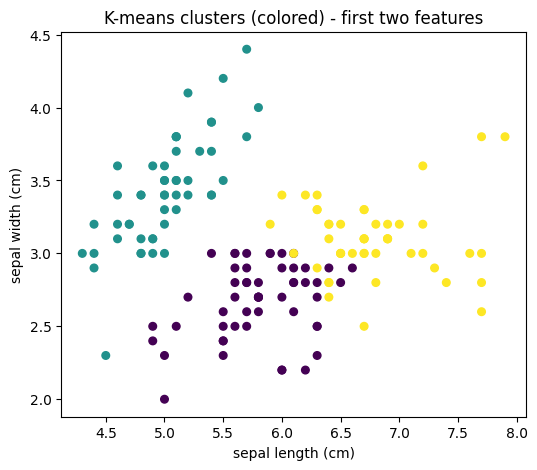

In [1]:
# Q8: K-means clustering example (Iris dataset)
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Fit k-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_s)

# Evaluate clustering
sil = silhouette_score(X_s, labels)
ari = adjusted_rand_score(y, labels)
print(f"Silhouette score (k=3): {sil:.4f}")
print(f"Adjusted Rand Index (vs true labels): {ari:.4f}")

# Show cluster centers (in original feature space)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=feature_names)
print("\\nCluster centers (original scale):")
print(centers_df)

# Simple 2D scatter using first two features colored by cluster
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title('K-means clusters (colored) - first two features')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

**Question 9: What is inheritance in OOP? Provide a simple example in Python.**

**Answer:**  
**Inheritance** is an OOP concept where a class (child/subclass) derives attributes and methods from another class (parent/superclass), allowing code reuse and a hierarchical relationship.

**Simple Python example:**

```python
class Animal:
    def __init__(self, name):
        self.name = name
    def speak(self):
        return "..."

class Dog(Animal):   # Dog inherits from Animal
    def speak(self):
        return "Woof!"

d = Dog("Buddy")
print(d.name)   # Buddy
print(d.speak())  # Woof!
```

**Question 10: How can time series analysis be used for anomaly detection?**

**Answer:**  
Time series anomaly detection identifies points or intervals where the observed values diverge from expected patterns (trend/seasonality). Common approaches include:
- **Statistical thresholding:** Deseasonalize/detrend data and flag points beyond a multiple of standard deviation (z-score).  
- **Model-based forecasting residuals:** Fit a forecasting model (ARIMA, Prophet, LSTM, etc.), compute residuals (actual - predicted), and flag large residuals as anomalies.  
- **Decomposition + density methods:** Decompose series into components, then apply density or distance-based anomaly detectors on residual/seasonally adjusted series.  
Applications: sensor fault detection, fraud detection in transaction timelines, monitoring KPIs and service health.